In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

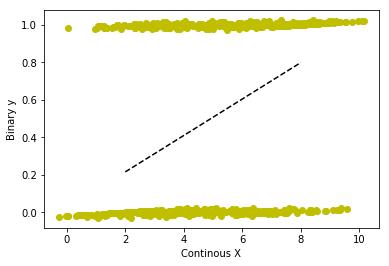

In [8]:
# Set the random seed so that the 'random' data is the same each time
# the code is run
np.random.seed(seed=456613)

# Create some data
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    })
    df = df.append(tmp)
    
# Continuous predictor
x = df['x']

# Binary outcome
bin_y = df['y']

# Calculate linear regression for x and bin_y
fit = np.polyfit(x,bin_y,1)

# Work as a function to return to predicted value of y
fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes
jitter = np.random.randn(700)

# Display our results
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continous X')
plt.ylabel('Binary y')
plt.show()

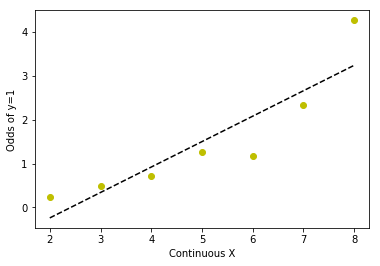

In [10]:
# Unique values in x
xvals = x.unique()

# Calculate and store the odds
yodds = []
for xi in xvals:
    y1_ct = bin_y[x == xi].sum() # the number of trials y = 1
    y0_ct = len(bin_y[x == xi]) - y1_ct # the number of trials y = 0
    yodds.append(y1_ct / y0_ct) # odd of getting y = 1 for xi
    
# Calculate linear regression for x and yodds
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds
fit_fn = np.poly1d(fit)

# Display our work
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous X')
plt.ylabel('Odds of y=1')
plt.show()